In [ ]:
from tensorflow.keras.datasets import  fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
import numpy as np

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from matplotlib.image import imread

In [ ]:
from matplotlib.pyplot import imshow

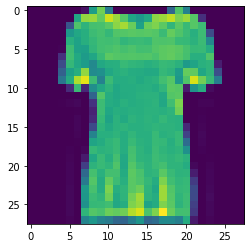

In [ ]:
imshow(X_train[10])

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train = X_train.reshape(len(X_train), X_train[0].shape[0],X_train[0].shape[1],1)
X_test = X_test.reshape(len(X_test), X_test[0].shape[0],X_test[0].shape[1],1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
from kerastuner import HyperParameters, RandomSearch

In [ ]:
tuner = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory = 'output', project_name = 'MNIST_FASHION')

In [ ]:
tuner.search(X_train, y_train_cat, epochs = 3, validation_split = 0.1)

Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5404 - accuracy: 0.8059 - val_loss: 0.4199 - val_accuracy: 0.8412
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4166 - accuracy: 0.8437 - val_loss: 0.4198 - val_accuracy: 0.8462
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3887 - accuracy: 0.8550 - val_loss: 0.4280 - val_accuracy: 0.8448


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3990 - accuracy: 0.8567 - val_loss: 0.3120 - val_accuracy: 0.8857
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2587 - accuracy: 0.9057 - val_loss: 0.2709 - val_accuracy: 0.8962
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2038 - accuracy: 0.9239 - val_loss: 0.2521 - val_accuracy: 0.9087


Epoch 1/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5223 - accuracy: 0.8116 - val_loss: 0.4132 - val_accuracy: 0.8502
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3962 - accuracy: 0.8541 - val_loss: 0.4075 - val_accuracy: 0.8470
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3595 - accuracy: 0.8689 - val_loss: 0.3653 - val_accuracy: 0.8680


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4560 - accuracy: 0.8391 - val_loss: 0.3200 - val_accuracy: 0.8823
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3241 - accuracy: 0.8819 - val_loss: 0.3730 - val_accuracy: 0.8742
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2885 - accuracy: 0.8943 - val_loss: 0.3284 - val_accuracy: 0.8840


Epoch 1/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3987 - accuracy: 0.8549 - val_loss: 0.3261 - val_accuracy: 0.8785
Epoch 2/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2614 - accuracy: 0.9042 - val_loss: 0.2864 - val_accuracy: 0.8965
Epoch 3/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2032 - accuracy: 0.9235 - val_loss: 0.2806 - val_accuracy: 0.9032


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        89632     
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                743472    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 834,714
Trainable params: 834,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 2)

In [ ]:
best_model.fit(X_train, y_train_cat, batch_size = 32, epochs = 2, validation_data = (X_test, y_test_cat))

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1719 - accuracy: 0.9368 - val_loss: 0.2507 - val_accuracy: 0.9106
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1292 - accuracy: 0.9512 - val_loss: 0.2794 - val_accuracy: 0.9150


In [ ]:
res = pd.DataFrame(best_model.history.history)
res

,loss,accuracy,val_loss,val_accuracy
0,0.171878,0.936800,0.250702,0.9106
1,0.129239,0.951183,0.279438,0.9150


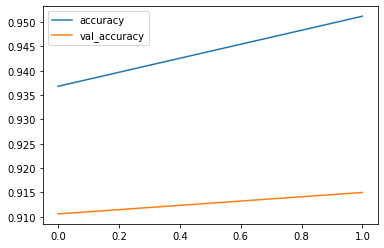

In [ ]:
res[['accuracy','val_accuracy']].plot()

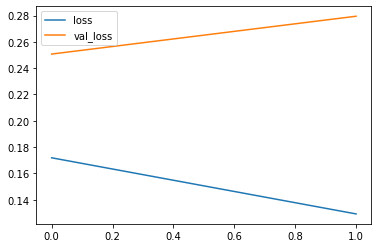

In [ ]:
res[['loss','val_loss']].plot()